Notebook to list all ffeature engineering recipes

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan 

In [6]:
data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv', index=False)

## Recipe 1. 
Identify numerical (discrete and continuous) and categorical variables.

We will use the titanic data set.

Please refer to the **DataPrep_titanic.ipynb** Jupyter notebook for instructions on how to download, pre-process and store the data

In [ ]:
# load the titanic dataset as example

data = pd.read_csv('titanic.csv')
data.head()

In [ ]:
# print variable types
data.dtypes

In [ ]:
# inspect unique values - discrete variable
data['sibsp'].unique()

In [ ]:
# inspect unique values - continuous variable
data['fare'].unique()[0:20]

In [ ]:
# inspect unique values - categorical variable
data['embarked'].unique()

In [ ]:
# inspect unique values - mixed variable
data['cabin'].unique()[0:20]

In [ ]:
# histograms of discrete variables often show
# a bar plot shape, instead of continuous intervals

plt.figure(figsize=(8,6), dpi=80)
data['sibsp'].hist(bins=20)


In [ ]:
# histogram of continuous variable

plt.figure(figsize=(8,6), dpi=80)
data['fare'].hist(bins=50)

In [ ]:
# bar plots for categorical variables

plt.figure(figsize=(9,7), dpi=80)
data['embarked'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of passengers')
plt.title('embakred - port')

## Recipe 2

Missing data occurs when no data is stored for certain observations within a variable. In other words, missing data is the absence of values, and is a common occurrence in most data sets. In this recipe, we will quantify and visualize missing information in variables, utilizing the dataset from the [KDD-CUP-98](https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data) available in the UCI Machine Learning Repository.


In [24]:
# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [ ]:
# we will use the selected variables for the recipe
cols = [
    'AGE',
    'NUMCHLD',
    'INCOME',
    'WEALTH1',
    'MBCRAFT',
    'MBGARDEN',
    'MBBOOKS',
    'MBCOLECT',
    'MAGFAML',
    'MAGFEM',
    'MAGMALE',
]

# load the dataset
data = pd.read_csv('cup98LRN.txt', usecols=cols)

# let's inspect the first 5 rows
data.head()

In [ ]:
# we can quantify the total number of missing values using
# the isnull() method plus the sum() method on the dataframe

data.isnull().sum()

In [ ]:
# alternatively, we can use the mean() method after isnull()
# to visualise the percentage of missing values for each variable

data.isnull().mean() * 100

In [ ]:
# we can also plot the percentages of missing data utilising
# pandas plot.bar(), and add labels with matplotlib methods 
# as shown below

data.isnull().mean().plot.bar(figsize=(12,8))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

## Recipe 3. 
Cardinality refers to the number of unique categories in each variable. Thus, the cardinality of the variable gender, which takes the values 'male' and 'female' is 2, whereas the cardinality of the variable civil status, which takes values 'married', 'divorced', 'single' and 'widow' is 4.

In this recipe, we will quantify and visualize the cardinality of categorical variables, utilizing the dataset from the [KDD-CUP-98](https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data) available in the UCI Machine Learning Repository.


In [ ]:
# we will use the selected variables for the recipe
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']

# load the dataset
data = pd.read_csv('cup98LRN.txt', usecols=cols)

# the dataset contains empty strings
# which are in essence missing values
# I replace those here
data = data.replace(' ', np.nan)

# let's inspect the first 5 rows
data.head()

In [35]:
# with the following command we can learn the cardinality
# of each of the loaded variables

data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [ ]:
# nunique() ignores missing data by default. If we want
# to consider missing values as an additional category
# we need to explicitly mention so, passing the argument
# dropna=False

data.nunique(dropna=False)

In [ ]:
# let's print the different unique labels
data['GENDER'].unique()

In [ ]:
# let's plot the cardinality of the variables 

data.nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [ ]:
# if we want to evaluate the cardinality of only a subset 
# of columns from a data set, we can do so by passing the
# columns of interest as follows:

# evaluate cardinality of variables of choice
data[['RFA_2', 'MDMAUD_A', 'RFA_2']].nunique()

## Recipe 4
Rare categories, are those that are only present for a tiny minority of the observations in the dataset. Normally, we consider anything under 5% or 1% a rare occurrence. In this recipe, we will learn to quantify and visualize the frequency of rare categories, utilizing the Car Evaluation dataset from the UCI Machine Learning Repository.


In [ ]:
# load the Car Evaluation Dataset

# this data does not include the columns, so we need
# to indicate so while loading by passing header=None

data = pd.read_csv('../car.data', header=None)

# add the column names manually
# column descriptions are indicated in the UCI website
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.head()

In [41]:
# let's find the cardinality of the variable
# the number of unique categories

data['class'].nunique()

4

In [ ]:
# let's inspect the name of the categories

data['class'].unique()

In [46]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
# now let's calculate the frequency for each category

# code as in book:

label_freq = data['class'].value_counts() / len(data)

# let's inspect the frequency of the labels
label_freq

In [ ]:
# same code a bit nicer

# now let's calculate the frequency for each category

# first we calculate the total number of cars in the dataset
total_cars = len(data)
print('Total number of cars {}'.format(total_cars))

# then we calculate label frequency
# value_counts() counts the number of cars per label
# by dividing by total cars we obtain the frequency

label_freq = data['class'].value_counts() / total_cars

# let's inspect the frequency of the labels
label_freq

In [ ]:
# let's make plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

## Recipe 5

Linear models assume that the dependent variables X take a linear relationship with the dependent variable Y. If the assumption is not met, the model may show poor performance. In this recipe, we will learn how to visualize the linear relationships between X and Y.

In [49]:
# for plotting

import seaborn as sns

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

In [108]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


        ["CRIM" , "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT","MEDV"]     

In [75]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
# boston_dataset = load_boston()

# create a dataframe with the independent variables
boston_cols = ["CRIM" , "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]  

# boston = pd.DataFrame(boston_dataset.data,
#                      columns=boston.feature_names)

boston = pd.DataFrame(boston_data,
                      columns=boston_cols)


# add the target
boston['MEDV'] = boston_target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

# print(boston_data.DESCR)
boston.info

In [92]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots
# i.e., how the plots should look like if the
# linear assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 20.80000000000002, 'Independent variable')

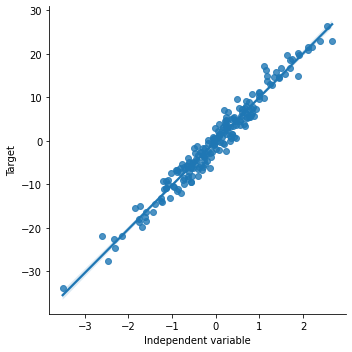

In [93]:
# for the simulated data

# this is how the scatter-plot looks like when
# there is a linear relationship between X and Y

sns.lmplot(x="x", y="y", data=data, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

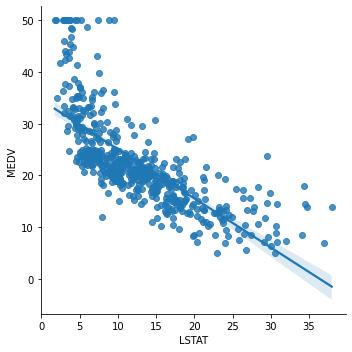

In [94]:
# now we make a scatter plot for the boston
# house price dataset

# we plot the variable LAST (% lower status of the population)
# vs the target MEDV (median value of the house)

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

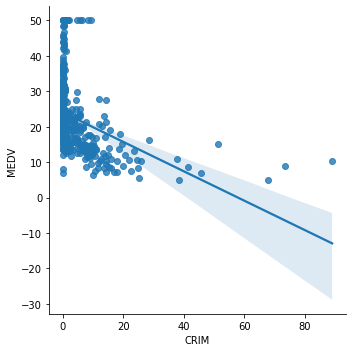

In [95]:
# now we plot CRIM (per capita crime rate by town)
# vs the target MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

Text(0, 0.5, 'Real value')

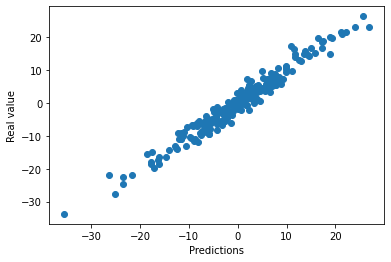

In [96]:
# SIMULATED DATA

# step 1: build a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(data['x'].to_frame(), data['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(data['x'].to_frame())

# step 3: calculate the residuals
error = data['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Text(0.5, 0, 'Independent variable x')

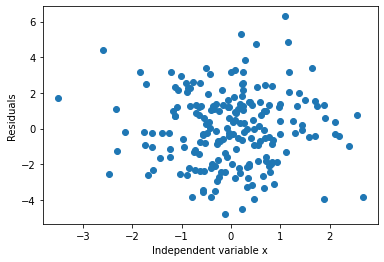

In [97]:
# step 4: observe the distribution of the residuals

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

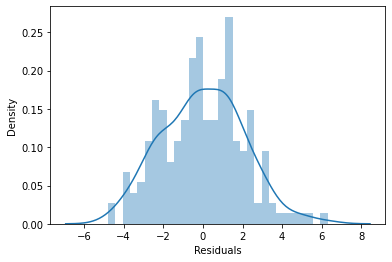

In [98]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

Text(0.5, 0, 'Residuals')

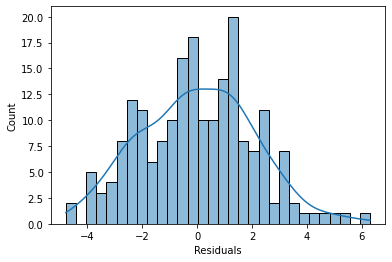

In [99]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.histplot(error, bins=30, kde=True)
plt.xlabel('Residuals')

Text(0, 0.5, 'MEDV')

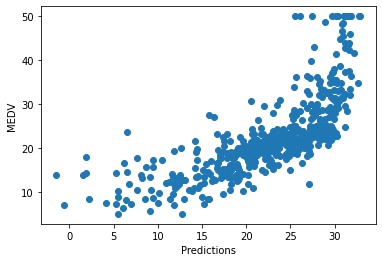

In [100]:
# now we do the same for the variable LSTAT of the boston
# house price dataset from sklearn

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

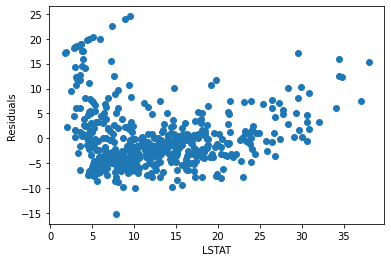

In [101]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

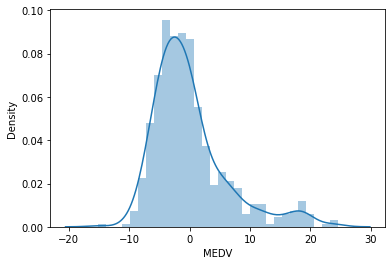

In [102]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

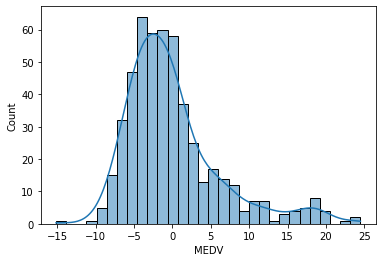

In [103]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.histplot(error, bins=30, kde=True)

for this particular case, the residuals are centered around zero, but they are not homogeneously distributed across the values of LSTAT. Bigger and smaller values of LSTAT show higher residual values. In addition, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.

In [104]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [106]:
boston.to_csv('boston.csv', encoding='utf-8', index=False)

In [ ]:
boston_recover = pd.read_csv('boston.csv')
boston_recover.head()